Deteccion de fraudes

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#hacemos nuestras  importaciones

In [6]:
# Provide the correct path to the dataset
df = pd.read_csv('AIML_Dataset.csv')

In [7]:
df.head() 

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [10]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

Tenemos 8213 fraudes 

In [11]:
# revisamos los valores faltantes 
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

No tenemos valores faltantes 

In [12]:

df.shape

(6362620, 11)

In [13]:

df['isFraud'].value_counts()[1] / df.shape[0] * 100   
# 0.17% de los datos son fraudulentos, por lo que es un dataset altamente desbalanceado

0.12908204481801522

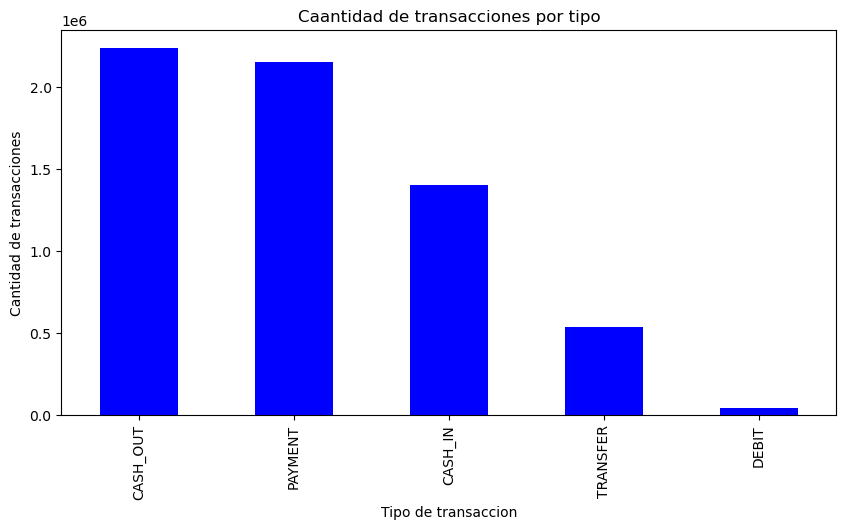

In [14]:
df['type'].value_counts().plot(kind='bar', title='Tipo de transaccion', color='blue', figsize=(10, 5))
plt.xlabel('Tipo de transaccion')
plt.ylabel('Cantidad de transacciones')
plt.title('Caantidad de transacciones por tipo')     
plt.show()

In [15]:
fraud_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
# creamos un nuevo dataframe con la media de isFraud por tipo de transaccion
fraud_type 


type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64

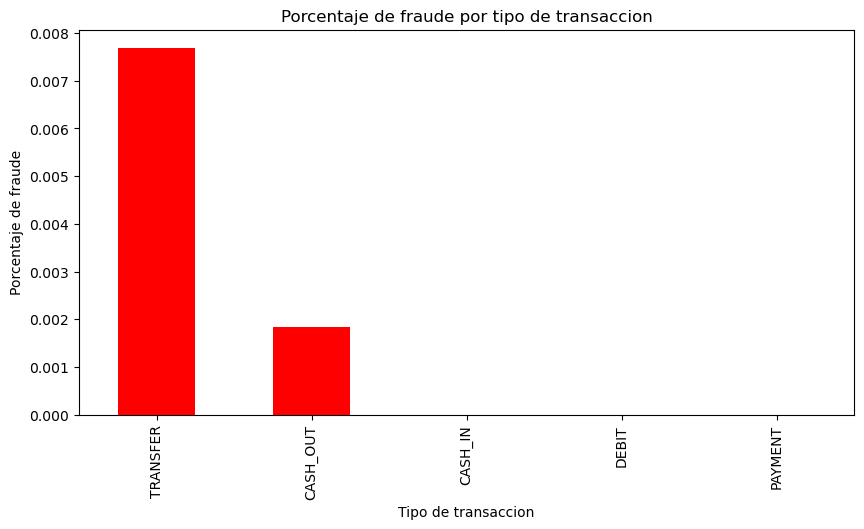

In [16]:
fraud_type.plot(kind='bar', title='Fraude por tipo de transaccion', color='red', figsize=(10, 5))
plt.xlabel('Tipo de transaccion')
plt.ylabel('Porcentaje de fraude')
plt.title('Porcentaje de fraude por tipo de transaccion')
plt.show()

Podemos observar que hay mas fraudes por tipo de transferencia, seguido de efectivo

In [17]:
df['amount'].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int32

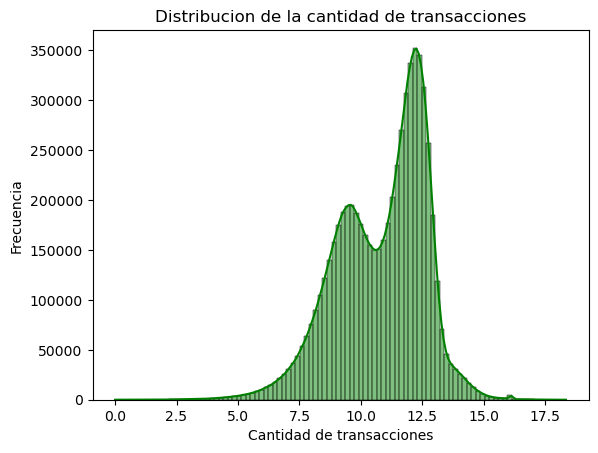

In [18]:
amount_log = np.log1p(df['amount'])
sns.histplot(amount_log, bins=100, kde=True, color='green')
plt.title('Distribucion de la cantidad de transacciones')
plt.xlabel('Cantidad de transacciones')
plt.ylabel('Frecuencia')
plt.show()
#l log1p "aplasta" los valores grandes y expande los chicos, haciendo la distribución más "normal" o simétrica para visualizar o modelar mejor. 

C:\Users\joel_\AppData\Local\Temp\ipykernel_22260\2257652333.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y='amount', data=df[df['amount']<50000], palette='Set2')


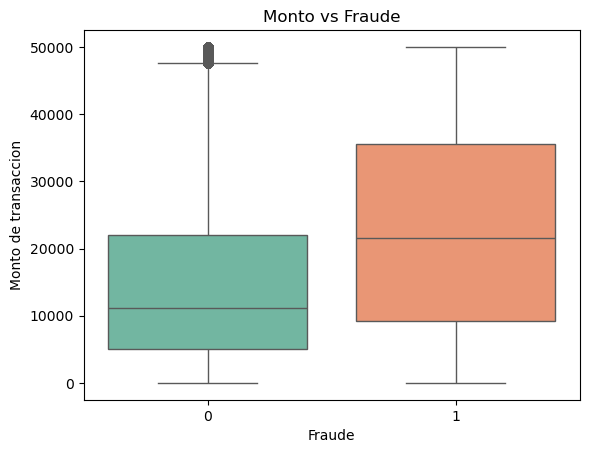

In [19]:
sns.boxplot(x='isFraud', y='amount', data=df[df['amount']<50000], palette='Set2')
# eliminamos los outliers para visualizar mejor la distribucion de los datos (Esto es para evitar que valores extremadamente grandes deformen el boxplot.)
plt.title('Monto vs Fraude')
plt.xlabel('Fraude')    
plt.ylabel('Monto de transaccion')
plt.show()


In [20]:
df.drop(columns=['step'], inplace=True)

In [ ]:
df.head() 
# ya no tenemos la columna step, ya que no es relevante para el análisis.

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [26]:
fraud_users = df[df['isFraud'] == 1]['nameOrig'].value_counts().head(10)
# creamos un nuevo dataframe con los 10 usuarios que más fraude han cometido
# el fraude es igual a 1, por lo que filtramos por isFraud == 1 y contamos los valores de nameOrig
fraud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [ ]:
fraud_types = df[df['type'].isin(['CASH_OUT', 'TRANSFER'])]
# crea un dataframe co solo dos tupos de fraudes 
fraud_types['type'].value_counts()
# cuenta los valores que aparcen de cada uno 

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

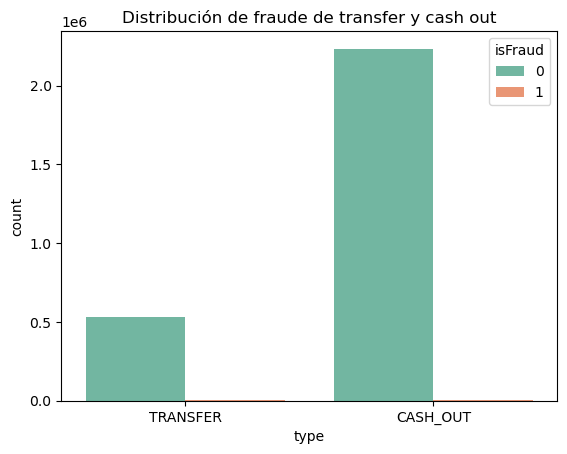

In [42]:
sns.countplot(x='type', data=fraud_types, hue='isFraud',  palette='Set2')
plt.title('Distribución de fraude de transfer y cash out')
plt.show()

In [43]:
df.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [46]:
df_numericas = df.select_dtypes(include=['number']) 
matriz_corr = df_numericas.corr()
matriz_corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


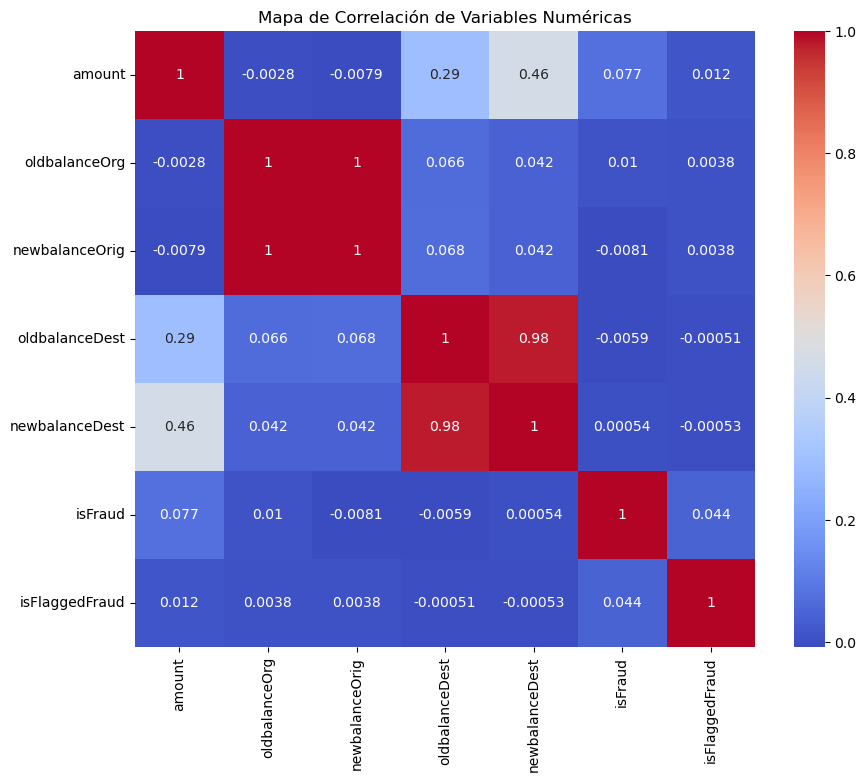

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Correlación de Variables Numéricas')
plt.show() 

In [49]:
zero_after_tranfer  = df[
    (df['oldbalanceOrg'] > 0) &
    (df['newbalanceOrig'] == 0) &
    (df['type'].isin(['TRANFER','CASH_OUT']))

]
zero_after_tranfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0
15,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,0,0
42,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.0,2415.16,0,0
47,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,0,0
51,CASH_OUT,23261.30,C2072313080,20411.53,0.0,C2001112025,25742.0,0.00,0,0


Ingenieria de caractersticas, seleccion de features o columnas 

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from  sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing  import OneHotEncoder, FunctionTransformer


In [51]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [52]:
# eliminar columnas
df_model =  df.drop(columns=[ 'nameOrig', 'nameDest', 'isFlaggedFraud'])
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [53]:
categorical_features = ['type']
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

In [54]:
y = df_model['isFraud']
X = df_model.drop(columns=['isFraud']) # todas las columnas excepto frauds 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# stratify = y asegura que la proporción de clases en el conjunto de entrenamiento y prueba sea la misma que en el conjunto original.   
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5090096, 6), (1272524, 6), (5090096,), (1272524,))

In [ ]:
# preprocesar los datos 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='drop'
) 


In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),  ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])
  

In [59]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [60]:
y_pred = pipeline.predict(X_test)

In [61]:
confusion_matrix(y_test, y_pred)

array([[1270813,      68],
       [   1014,     629]], dtype=int64)

Tamaño del dataset: 6,362,620 registros
Fraudes reales (isFraud = 1): solo 8,213 casos.
  -----------------Predicho No Fraude (0) --- Predicho Fraude (1)

Real No Fraude (0)	1,270,813	                     68

Real Fraude (1)	    1,014	                         629

TN (True Negative): 1,270,813 → Eran no fraude y el modelo predijo no fraude 

FP (False Positive): 68 → Eran no fraude, pero el modelo pensó que eran 

FN (False Negative): 1,014 → Eran fraude, pero el modelo no los detectó 
TP (True Positive): 629 → Eran fraude y el modelo sí los detectó 



In [62]:
pipeline.score(X_test, y_test)* 100 

99.91497213412084